<a href="https://colab.research.google.com/github/RitwikSharma107/news-headlines-sarcasm-detection/blob/master/News_Headlines_Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing 

## Sarcastic News Headlines
* Real World Data
* Each record consists of three attributes:

  1. is_sarcastic: 1 if the record is sarcastic otherwise 0

  2. headline: the headline of the news article

  3. article_link: link to the original news article. Useful for collecting supplementary data




In [ ]:
# Get the data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-08-14 15:25:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  31.4MB/s    in 0.2s    

2020-08-14 15:25:14 (31.4 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
# Import libraries

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Initialize variables

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
# Collect data into lists

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Data Preprocessing

In [ ]:
# Split the data

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
# Assign numerical values to the data uniformly in order to feed the neural network

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Ensure that the data is numpy array

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Data Modelling

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 2s - loss: 0.6643 - accuracy: 0.5860 - val_loss: 0.5848 - val_accuracy: 0.7721
Epoch 2/10
625/625 - 2s - loss: 0.4393 - accuracy: 0.8289 - val_loss: 0.3880 - val_accuracy: 0.8427
Epoch 3/10
625/625 - 2s - loss: 0.3140 - accuracy: 0.8771 - val_loss: 0.3550 - val_accuracy: 0.8514
Epoch 4/10
625/625 - 2s - loss: 0.2598 - accuracy: 0.8994 - val_loss: 0.3433 - val_accuracy: 0.8568
Epoch 5/10
625/625 - 2s - loss: 0.2228 - accuracy: 0.9150 - val_loss: 0.3442 - val_accuracy: 0.8544
Epoch 6/10
625/625 - 2s - loss: 0.1950 - accuracy: 0.9263 - val_loss: 0.3527 - val_accuracy: 0.8551
Epoch 7/10
625/625 - 2s - loss: 0.1732 - accuracy: 0.9346 - val_loss: 0.3684 - val_accuracy: 0.8538
Epoch 8/10
625/625 - 2s - loss: 0.1544 - accuracy: 0.9420 - val_loss: 0.3801 - val_accuracy: 0.8553
Epoch 9/10
625/625 - 2s - loss: 0.1396 - accuracy: 0.9500 - val_loss: 0.4100 - val_accuracy: 0.8456
Epoch 10/10
625/625 - 2s - loss: 0.1272 - accuracy: 0.9566 - val_loss: 0.4230 - val_accuracy: 0.8481

## Evaluation

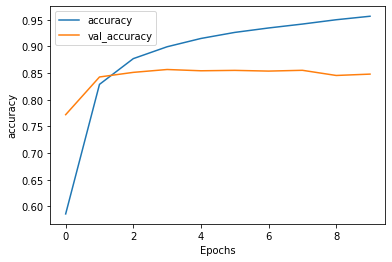

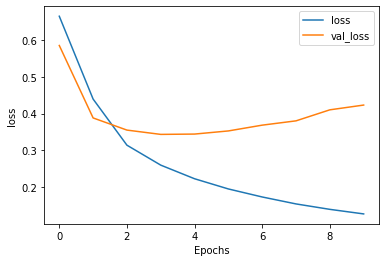

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# (Not Sarcastic) 0 - 1 (Sarcastic)

sentence = ["Thank you for your help.", "It’s okay if you don’t like me. Not everyone has good taste."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.01341113]
 [0.99517393]]


# Recurrent Neural Network (RNN) with Long Short Term Memory (LSTM)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-08-14 16:41:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2020-08-14 16:41:49 (53.0 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

## Data Preprocessing

In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Data Modelling

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), # return_sequences=True, if there is another LSTM layer (Execpt in last layer)
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/10
625/625 [==============================] - 37s 59ms/step - loss: 0.4500 - accuracy: 0.7703 - val_loss: 0.3849 - val_accuracy: 0.8210
Epoch 2/10
625/625 [==============================] - 36s 58ms/step - loss: 0.3401 - accuracy: 0.8461 - val_loss: 0.3660 - val_accuracy: 0.8325
Epoch 3/10
625/625 [==============================] - 36s 58ms/step - loss: 0.3146 - accuracy: 0.8590 - val_loss: 0.3714 - val_accuracy: 0.8326
Epoch 4/10
625/625 [==============================] - 36s 58ms/step - loss: 0.2998 - accuracy: 0.8673 - val_loss: 0.3834 - val_accuracy: 0.8292
Epoch 5/10
625/625 [==============================] - 36s 58ms/step - loss: 0.2872 - accuracy: 0.8737 - val_loss: 0.3756 - val_accuracy: 0.8281
Epoch 6/10
625/625 [==============================] - 36s 58ms/step - loss: 0.2821 - accuracy: 0.8776 - val_loss: 0.4000 - val_accuracy: 0.8234
Epoch 7/10
625/625 [==============================] - 36s 58ms/step - loss: 0.2720 - accuracy: 0.8809 - val_loss: 0.3922 - val_accuracy:

## Evaluation

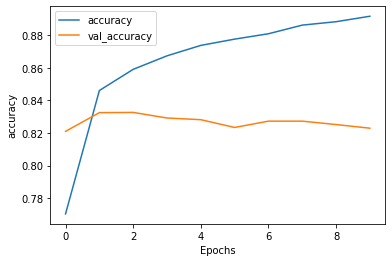

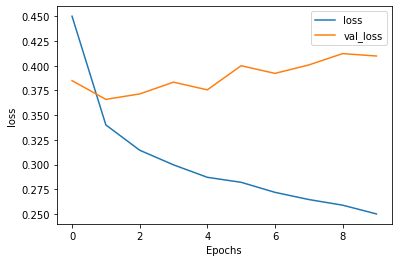

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# (Not Sarcastic) 0 - 1 (Sarcastic)

sentence = ["Thank you for your help.", "It’s okay if you don’t like me. Not everyone has good taste."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.04203384]
 [0.832899  ]]
